# Bike Rental Gothenburg

* Exploration of Bike Rental in Gothenburg

In [262]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from sklearn.cluster import KMeans

In [135]:
#Data import
df = pd.read_excel('bike-rental-gbg-travel-2020.xlsx')
df = df.rename(columns = {"Start time": "start_time", "End time": "end_time", "Duration" : "duration",
                              "Start station number" : "start_station_num", "Rental place" : "start_station_name",
                              "End station number" : "end_station_num", "Return place" : "end_station_name",
                              "Bike number" : "bike_number"})

In [209]:
#Quick check of data
print('shape: '+  str(df.shape))
print(df.dtypes)
df.head()

shape: (190288, 8)
start_time            datetime64[ns]
end_time              datetime64[ns]
duration                       int64
start_station_num            float64
start_station_name            object
end_station_num              float64
end_station_name              object
bike_number                    int64
dtype: object


,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
0,2020-06-10 06:17:03,2020-06-10 06:30:06,14,41189.0,Domkyrkan,41189.0,Domkyrkan,710161
1,2020-06-10 06:30:36,2020-06-10 06:31:49,2,41189.0,Domkyrkan,41189.0,Domkyrkan,710939
2,2020-06-10 06:34:57,2020-06-10 06:36:43,2,41189.0,Domkyrkan,41189.0,Domkyrkan,710067
3,2020-06-10 06:37:54,2020-06-10 06:39:01,2,41189.0,Domkyrkan,41189.0,Domkyrkan,710817
4,2020-06-10 06:46:44,2020-06-10 07:00:44,14,41184.0,Östra Hamngatan/Kronhusgatan,41174.0,Masthuggstorget,710914


In [84]:
# Desceribe columns
# 192088 total amount of rows
# 185180 start station
# 183586 end station

df.describe()


,duration,start_station_num,end_station_num,bike_number
count,190288.000000,185180.000000,183586.000000,190288.000000
mean,38.466698,41168.081434,41166.660366,710995.062090
std,288.429364,32.306960,31.195141,573.894224
min,1.000000,40998.000000,40995.000000,710000.000000
25%,7.000000,41144.000000,41142.000000,710496.000000
50%,11.000000,41169.000000,41166.000000,710994.000000
75%,18.000000,41190.000000,41189.000000,711488.000000
max,43236.000000,41300.000000,41250.000000,711999.000000


In [30]:
#Explore bike numbers
bike_numbers = df['bike_number'].unique()
print('Lowest bike number: ' + str(bike_numbers.min()))
print('Highest bike numbers: ' + str(bike_numbers.max()))
print('Number of bikes:' + str(len(bike_numbers)))

Lowest bike number: 710000
Highest bike numbers: 711999
Number of bikes:1995


In [210]:
curr_highest = df['start_time'][0]
curr_latest_bike = 71000
for num in bike_numbers:
    candidate_time = df['start_time'][df['bike_number'] == num].head(1).iloc[0]
    if candidate_time > curr_highest:
        curr_highest = candidate_time
        curr_latest_bike = num

df[df['bike_number'] == curr_latest_bike]

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
169879,2020-11-23 18:42:43,2020-11-23 18:43:46,2,41215.0,Lindholmspiren,41215.0,Lindholmspiren,710927


In [82]:
# Duration column
# Possibly to remove some data points here that can impact mean.
# What are the reasons for such a long period?
df['duration'].sort_values(axis = 0, ascending = False).head(20)

161205    43236
9348      21599
9644      21018
8051      17090
75834     16580
1495      15849
8839      15745
75753     15431
7924      14565
75768     14226
1593      14133
1076      12704
10237     12690
75792     12682
75794     12585
10294     12532
10295     12530
75798     12524
75799     12443
75800     12420
Name: duration, dtype: int64

In [108]:
# Station column
# How many stations have been started from or ended to only?
# How can this be?

print('__Minimum stations__ \n' + 'Start station : ' +  str(df['start_station_num'].min()) +
      '\nEnd station: ' + str(df['end_station_num'].min()))

print('\n__Maximum stations__ \n' + 'Start station : ' +  str(df['start_station_num'].max()) +
      '\nEnd station: ' + str(df['end_station_num'].max()))

print('Intresting stations exist --> workshop outgoing bikes (40998) - workshop needs repair(40999) etc')
df[df['start_station_num'] < 41000]


__Minimum stations__ 
Start station : 40998.0
End station: 40995.0

__Maximum stations__ 
Start station : 41300.0
End station: 41250.0
Intresting stations exist --> workshop outgoing bikes (40998) - workshop needs repair(40999) etc


,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
203,2020-06-10 17:14:19,2020-06-10 17:42:46,29,40998.0,workshop - outgoing bikes,41178.0,Östra Hamngatan,710584
690,2020-06-11 21:08:44,2020-06-11 21:12:31,4,40998.0,workshop - outgoing bikes,41107.0,Mölndals bro,710331
2350,2020-06-15 08:04:56,2020-06-15 08:05:48,1,40999.0,workshop - needs repair,NaN,NaN,710038
3970,2020-06-18 07:45:35,2020-06-18 07:46:08,1,40998.0,workshop - outgoing bikes,NaN,NaN,710709
4143,2020-06-18 14:20:15,2020-06-18 14:40:57,21,40998.0,workshop - outgoing bikes,41178.0,Östra Hamngatan,710454
...,...,...,...,...,...,...,...,...
184878,2020-12-16 14:57:16,2020-12-16 14:58:05,1,40999.0,workshop - needs repair,41204.0,Vasagatan/Schillerska,710603
185456,2020-12-17 12:52:28,2020-12-17 12:53:56,2,40999.0,workshop - needs repair,NaN,NaN,710339
185483,2020-12-17 14:59:09,2020-12-17 15:34:38,36,40999.0,workshop - needs repair,41131.0,Valand,711236
185499,2020-12-17 15:40:48,2020-12-23 09:55:04,8295,40998.0,workshop - outgoing bikes,40998.0,workshop - outgoing bikes,710386


In [105]:
df[df['end_station_num'] < 40998]

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
75718,2020-06-18 06:45:02,2020-06-18 07:02:25,18,NaN,NaN,40995.0,workshop - Scrapped bikes,710612
75808,2020-06-30 16:38:00,2020-07-04 12:51:35,5534,41213.0,Wieselgrensplatsen,40996.0,workshop - needs heavy repair,710706
75816,2020-06-30 21:39:17,2020-07-08 12:46:15,10987,41213.0,Wieselgrensplatsen,40996.0,workshop - needs heavy repair,710614
75843,2020-07-02 14:54:57,2020-07-02 15:11:19,17,41134.0,Gustaf Adolfs torg,40996.0,workshop - needs heavy repair,710157
75854,2020-07-02 19:57:01,2020-07-02 20:36:48,40,41112.0,Åby Arenastad,40996.0,workshop - needs heavy repair,710725
75855,2020-07-02 19:57:01,2020-07-02 20:36:48,40,41112.0,Åby Arenastad,40996.0,workshop - needs heavy repair,710725
75930,2020-07-16 12:18:39,2020-07-16 13:26:32,68,41135.0,Rosenlundsplatsen,40996.0,workshop - needs heavy repair,710860
75937,2020-07-16 19:35:41,2020-07-17 09:04:23,809,41202.0,Gamlestads torg,40996.0,workshop - needs heavy repair,710173
75949,2020-07-17 20:57:01,2020-07-18 10:09:54,793,41209.0,Hjalmar Brantingsplatsen,40995.0,workshop - Scrapped bikes,710377
76022,2020-07-24 19:11:52,2020-07-28 08:18:06,5107,41186.0,Lindholmsplatsen,40996.0,workshop - needs heavy repair,710762


In [109]:
df[df['start_station_num'] > 41250]

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
98,2020-06-10 14:07:59,2020-06-10 14:08:48,1,41300.0,Test Station Workshop,NaN,NaN,710003


In [112]:
df[df['end_station_name'] == 'workshop - needs heavy repair']

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
75808,2020-06-30 16:38:00,2020-07-04 12:51:35,5534,41213.0,Wieselgrensplatsen,40996.0,workshop - needs heavy repair,710706
75816,2020-06-30 21:39:17,2020-07-08 12:46:15,10987,41213.0,Wieselgrensplatsen,40996.0,workshop - needs heavy repair,710614
75843,2020-07-02 14:54:57,2020-07-02 15:11:19,17,41134.0,Gustaf Adolfs torg,40996.0,workshop - needs heavy repair,710157
75854,2020-07-02 19:57:01,2020-07-02 20:36:48,40,41112.0,Åby Arenastad,40996.0,workshop - needs heavy repair,710725
75855,2020-07-02 19:57:01,2020-07-02 20:36:48,40,41112.0,Åby Arenastad,40996.0,workshop - needs heavy repair,710725
75930,2020-07-16 12:18:39,2020-07-16 13:26:32,68,41135.0,Rosenlundsplatsen,40996.0,workshop - needs heavy repair,710860
75937,2020-07-16 19:35:41,2020-07-17 09:04:23,809,41202.0,Gamlestads torg,40996.0,workshop - needs heavy repair,710173
76022,2020-07-24 19:11:52,2020-07-28 08:18:06,5107,41186.0,Lindholmsplatsen,40996.0,workshop - needs heavy repair,710762
76032,2020-07-25 17:54:23,2020-07-25 18:38:48,45,NaN,NaN,40996.0,workshop - needs heavy repair,711487
76044,2020-07-27 14:32:08,2020-07-27 17:13:35,162,41133.0,Grönsakstorget,40996.0,workshop - needs heavy repair,711082


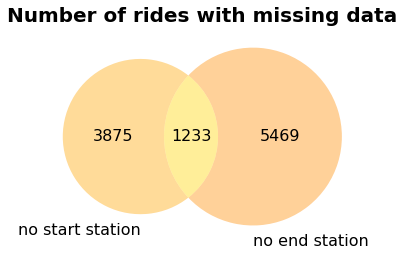

In [211]:
# Null Analysis
nan_start = df[(df['start_station_num'].isnull())].index
nan_end = df[(df['end_station_num'].isnull())].index

ven = venn2([set(nan_start), set(nan_end)],set_labels = ('no start station', 'no end station'),
      set_colors= ('orange', 'darkorange', 'orange'))
for text in ven.subset_labels:
    text.set_fontsize(16)
for text in ven.set_labels:
    text.set_fontsize(16)
plt.title('Number of rides with missing data', fontsize = 20, fontweight = 'bold')
plt.show()

In [ ]:
# Important to understand domain specific details
# Should we simply delete Nan? Fill it with values. NO!
# Interesting analysis of these bikes.
nan_start_either = df[(df['start_station_num'].isnull()) | (df['end_station_num'].isnull())]
nan_both = df[(df['start_station_num'].isnull()) & (df['end_station_num'].isnull())]
nan_start_not_end = df[(df['start_station_num'].isnull()) & (~df['end_station_num'].isnull())]
nan_end_not_start = df[(~df['start_station_num'].isnull()) & (df['end_station_num'].isnull())]

## Heatmap travel statistics

In [164]:
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df.groupby(df['start_time'].dt.day_name()).count().reindex(days_order)

months_order = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
df.groupby(df['start_time'].dt.month_name()).count().reindex(months_order)

,start_time,end_time,duration,start_station_num,start_station_name,end_station_num,end_station_name,bike_number
start_time,,,,,,,,
June,11176,11176,11176,10360,10360,10035,10035,11176
July,21929,21929,21929,20773,20773,20291,20291,21929
August,39140,39140,39140,37871,37871,37563,37563,39140
September,44033,44033,44033,43123,43123,42862,42862,44033
October,35860,35860,35860,35296,35296,35155,35155,35860
November,22370,22370,22370,22117,22117,22075,22075,22370
December,15780,15780,15780,15640,15640,15605,15605,15780


In [197]:
df_plot = df.copy()
df_plot['day'] = df['start_time'].dt.day_name().astype(pd.api.types.CategoricalDtype(categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']))
df_plot['month'] = df['start_time'].dt.month_name().astype(pd.api.types.CategoricalDtype(categories = ['June', 'July', 'August', 'September', 'October', 'November', 'December']))
df_plot['hour'] = df['start_time'].dt.hour
# Simply get the count
month_day = pd.crosstab(df_plot['month'], df_plot['day'])
day_hour = pd.crosstab(df_plot['hour'], df_plot['day'])
month_hour = pd.crosstab(df_plot['hour'], df_plot['month'])
#tab = pd.crosstab(df_plot['month'], df_plot['day']).reindex(days_order, axis = 1, months_order, )
# Get the duration. Be careful that some might have very high value!
heatmap_data = pd.pivot_table(df_plot[['month', 'day', 'duration']], values = 'duration', index = ['month'], columns = 'day')


<AxesSubplot:xlabel='day', ylabel='month'>

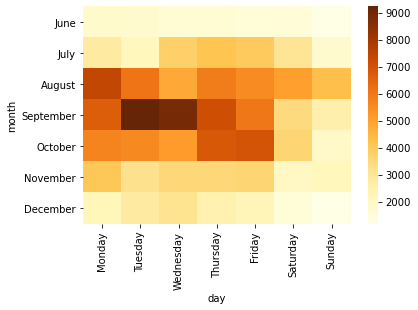

In [200]:
sns.heatmap(month_day, cmap = 'YlOrBr')

<AxesSubplot:xlabel='day', ylabel='hour'>

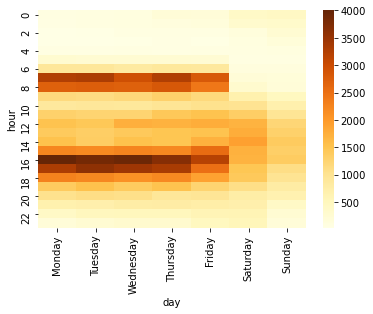

In [201]:
sns.heatmap(day_hour, cmap = 'YlOrBr')

<AxesSubplot:xlabel='month', ylabel='hour'>

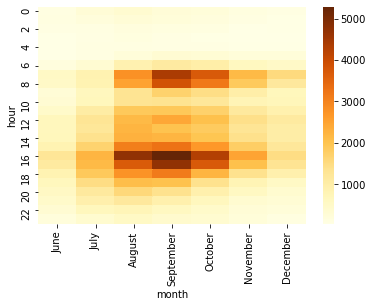

In [202]:
sns.heatmap(month_hour, cmap = 'YlOrBr')


<AxesSubplot:xlabel='day', ylabel='duration'>

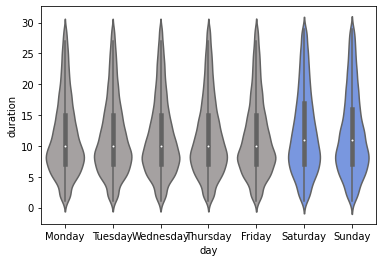

In [256]:
# Duration of travels
colors_list = ['#A5A1A1', '#A5A1A1',  '#A5A1A1',  '#A5A1A1',  '#A5A1A1', '#6890F0', '#6890F0']
sns.violinplot(x = 'day', y = 'duration', data = df_plot[df_plot['duration'] < 30], palette=colors_list)

<AxesSubplot:xlabel='month', ylabel='duration'>

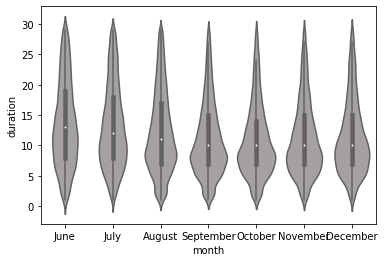

In [258]:
colors_list = ['#A5A1A1', '#A5A1A1',  '#A5A1A1',  '#A5A1A1',  '#A5A1A1', '#A5A1A1', '#A5A1A1']
sns.violinplot(x = 'month', y = 'duration', data = df_plot[df_plot['duration'] < 30], palette=colors_list)

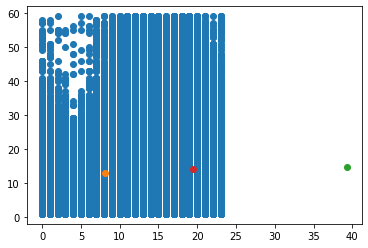

In [277]:
df_plot_dur_reduce = df_plot[df_plot['duration'] < 60]

kmeans = KMeans(n_clusters= 3).fit(df_plot_dur_reduce[['duration', 'hour']])
kmeans.cluster_centers_

plt.scatter(x = df_plot_dur_reduce['hour'], y = df_plot_dur_reduce['duration'])
plt.scatter(x = kmeans.cluster_centers_[0][0], y = kmeans.cluster_centers_[0][1])
plt.scatter(x = kmeans.cluster_centers_[1][0], y = kmeans.cluster_centers_[1][1])
plt.scatter(x = kmeans.cluster_centers_[2][0], y = kmeans.cluster_centers_[2][1])
#plt.scatter(x = kmeans.cluster_centers_[3][0], y = kmeans.cluster_centers_[3][1])

In [279]:
for i in  kmeans.labels_:
    if i == 0:
        print('0')


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<ipython-input-323-f40a219968fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_july_december['month'] = df_plot_july_december['month'].cat.remove_categories(['June', 'August', 'September', 'October', 'November'])


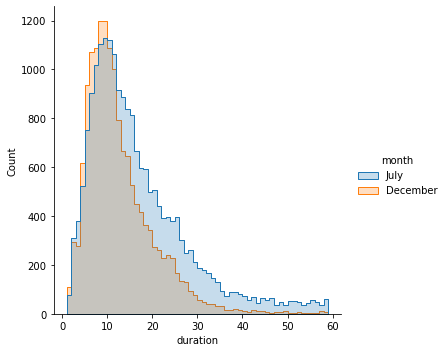

In [323]:
df_plot_july_december = df_plot_dur_reduce[df_plot_dur_reduce['month'].isin(['July', 'December'])]
df_plot_july_december['month'] = df_plot_july_december['month'].cat.remove_categories(['June', 'August', 'September', 'October', 'November'])
sns.displot(df_plot_july_december, x = 'duration', binwidth = 1, hue = 'month', element = 'step')

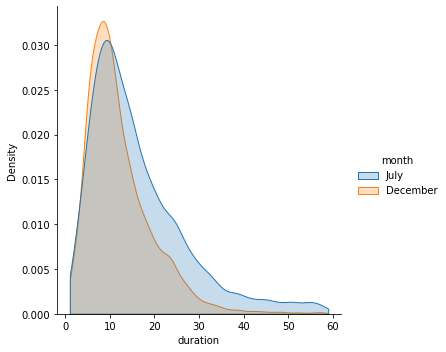

In [332]:
sns.displot(df_plot_july_december, x = 'duration', hue = 'month', kind = 'kde', fill = 'true', cut = 0)

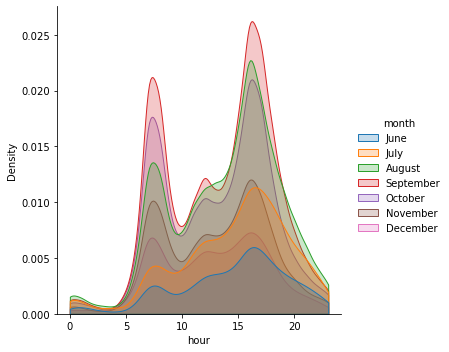

In [331]:
sns.displot(df_plot, x = 'hour', hue = 'month', kind = 'kde', fill = 'true', cut = 0)

In [ ]:
sns.displot(df_plot_dur_reduce, x = 'duration', binwidth = 2)


In [306]:
df_plot_july_december.groupby('month').sum()

,duration,start_station_num,end_station_num,bike_number,hour
month,,,,,
June,0,0.0,0.0,0,0
July,323370,780723675.0,768646870.0,14186458510,290110
August,0,0.0,0.0,0,0
September,0,0.0,0.0,0,0
October,0,0.0,0.0,0,0
November,0,0.0,0.0,0,0
December,187553,627294733.0,625863133.0,10926263544,196970


<AxesSubplot:xlabel='hour', ylabel='duration'>

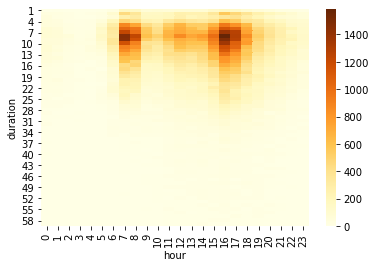

In [337]:
sns.heatmap(pd.crosstab(df_plot_dur_reduce['duration'], df_plot_dur_reduce['hour']), cmap = 'YlOrBr')


In [351]:
# Station

start_station_count = df_plot.groupby('start_station_name').count().sort_values(by = 'start_station_num', ascending=False).head(10)

In [352]:
end_station_count = df_plot.groupby('end_station_name').count().sort_values(by = 'end_station_num', ascending=False).head(10)

Index(['Drottningtorget', 'Hagabion', 'Chalmers tvärgata', 'Stenpiren',
       'Svingeln', 'Hagaparken', 'Landala torg', 'Valand', 'Linnéplatsen',
       'Olof Palmes plats'],
      dtype='object', name='start_station_name')

In [ ]:
start_station_count.index

4057
4287
3909
4039
6416
7022
3632
4111
4150
4610
3513
4885
4486
5156


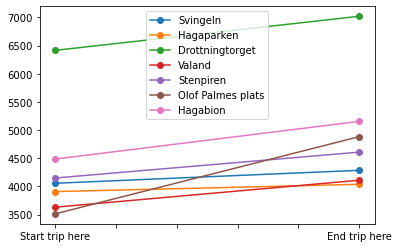

In [393]:
popular_stations = set.intersection(set(start_station_count.index), set(end_station_count.index))
for station in popular_stations:
    print(start_station_count.loc[station][0])
    print(end_station_count.loc[station][0])
    plt.plot([(start_station_count.loc[station][0]), (end_station_count.loc[station][0])], marker = 'o', label = station)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['Start trip here', '', '', '', '', 'End trip here'])
plt.legend()

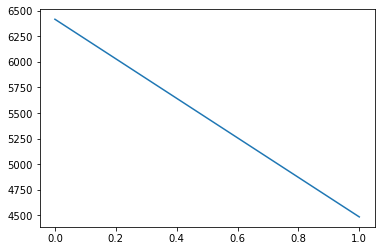

In [376]:
plt.plot([6416, 4486])

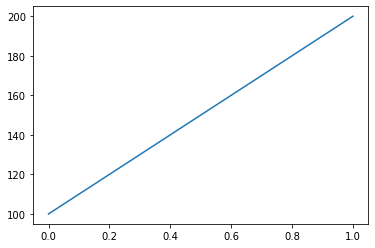

In [372]:
plt.plot([100,200])


In [355]:
print(type(start_station_count))

<class 'pandas.core.frame.DataFrame'>
